[View in Colaboratory](https://colab.research.google.com/github/liannesr/Homework-1-Machine-Learning/blob/master/Lianne_S%C3%A1nchez_Homework_1.ipynb)

## Homework 1 (TensorFlow tutorial)

In this homework, you'll get a brief tutorial as to how TensorFlow works "behind the scenes". Then, you'll put together some of the pieces you learned to train a very simple model.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### How TensorFlow works (and why)


TensorFlow is a framework which allows you to easily construct computational graphs. The graphs can then easily be compiled to run different architectures (for example, your laptop's CPU, or a Graphics Proessing Unit, or a Tensor Processing Unit). When you write TensorFlow code in Python, you are building up a computational graph which *describes the computation you want to do*. It won't actually run the computation until you tell it to. This allows it to perform different optimizations, transparently compile to different architectures, and do handy things like compute gradients easily. Once you build a graph in TensorFlow, you'll actually do computation by running things in a "session". So, to start, let's create a new graph and a new session.

In [0]:
# Reset the current TensorFlow graph
tf.reset_default_graph()
# Create a new TensorFlow session
sess = tf.InteractiveSession()

Now, let's start building up our computational graph. The graph will be made up of ops, which is short for operations. When run, the operations will carry out a specific computation. First, let's create a simple kind of operation: One which just holds a constant value. Whenever this operation is run, it will spit it the same (constant) value.

In [4]:
# Create a constant op called 'a' whose value is always 10
a = tf.constant(10.)
# Now let's look at the op
print (a)

Tensor("Const:0", shape=(), dtype=float32)


Note that when we printed out the op, it didn't tell us the value was 10! It just told us it has the name "Const:0", it has a shape of `()`, and it has a `float32` dtype. The name is just for convenience and is created automatically. A shape of `()` means that it's a scalar, that is, a single value (if it's not clear to you why this is true, don't worry about it, we will only really be working with scalars in this tutorial). Finally, the dtype is like a normal type you'd see in programming; a `float32` dtype means it's a 32-bit float.

To actually get the value of this op, we need to run it. Here's how we do that.

In [6]:
print (sess.run(a))

10.0


Let's build up our graph some more. We can create a new op in our graph which depends on `a` like so:

In [7]:
# Set b to the value of a, squared
b = a**2
# Let's see what b is.
print (b)

Tensor("pow:0", shape=(), dtype=float32)


Note, again, that printing b doesn't give us the actual value of `a` squared. It just tells us it's created a new op. This op has been given the name `pow_1:0` since it's the result of a power operation, that is, raising to the *power* of 2. It has the same shape and dtype as a. Let's run it and see what happens.

In [9]:
print (sess.run(b))

100.0


Now we're computing stuff! We can compute all kinds of things with TensorFlow - everything you'd need to build up a machine learning model and more. Let's make our graph a little bigger.

In [10]:
# Add a few more ops
c = 3*b + 2
print (c)

Tensor("add:0", shape=(), dtype=float32)


Notice that c is given the name `add:0`. What happened to the `3*b` part? Well, that multiplication *did* create a new op, but we didn't assign it to a Python variable, so we lost reference to it. You may have noticed this before, but when we do something like `b = a**2`, `b` doesn't represent the value of `a**2`, it is a *reference* to the op that computes b. So in other words, the Python variable `b` gives us a reference to the op; it doesn't compute the value of the op. So, we can't compute the result of `3*b` using `c`, we can only compute `3*b + 2`. We could have done something like this instead:
```
c = 3*b
d = c + 2
```
The way we wrote it assumes that we will never need to compute `3*b`, just `3*b + 2`.

Let's visualize what our graph looks like now:

![graph](https://i.imgur.com/lIbZvE5.png)

This is a visualization made by a tool called TensorBoard, which we won't cover here. The graph starts from the bottom and goes up. On the bottom, we see our "constant" op `Const_1` which, if you remember from above, is our value of 10. Then, we raise it to a power using the `pow_1` op. It's being raised to the power of `y`. Note that TensorFlow isn't telling us the values of `Const_1` or `y`, even though we know they are constant and are 10 and 2 respectively. Then, the result is passed into the `mul` op, being multiplied by a new constant value `x`. Finally, the result is passed to the `add` op where another `y` is added. So, this is our computational graph!

When we do `sess.run(c)`, we will be asking TensorFlow to give us the value of the `add` op at the top of the graph. To do so, it will traverse down the graph, calculating intermediate values as it goes.

In [11]:
print (sess.run(c))

302.0


So far, we have encountered two kinds of ops: Ops that just give a constant value, or ops that perform some kind of operation on their inputs (like multiplying or adding them). The constant ops take on a specific value, and can never change their value. Sometimes, it's useful to have things in our graph to have a value, but to allow the value to change. TensorFlow does this with "Variables". Let's create a variable.

In [12]:
# Create a variable called x
x = tf.get_variable(name='var', shape=(), dtype=tf.float32)
print (x)

<tf.Variable 'var:0' shape=() dtype=float32_ref>


There were some funny things about creating this variable.
1. We assigned it to the Python variable `x`. This means that the Python variable `x` is a reference to the TensorFlow variable called `var`. These are two different things! `var` is a variable in the TensorFlow graph. `x` is just a reference to that variable in Python so that we can access it from Python. Weird!
1. We didn't tell TensorFlow what value the Variable should take. TensorFlow actually has a default way that it sets the initial value of Variables - it chooses them randomly, in a sensible way! We're letting TensorFlow choose the initial value randomly. Since we didn't give TensorFlow an explicit value, we had to at least tell it what shape the variable was (again `()` for a scalar) and what data type it is.

Let's try running this variable to get its value.

In [13]:
sess.run(x)

FailedPreconditionError: ignored

Oh no! Got an Exception. TensorFlow is telling us that we can't use our Variable yet because we haven't told TensorFlow to initialize it. Initializing it means "set the Variable's value to whatever the initial value is supposed to be". Let's do that now.

In [14]:
# Simplest way to initialize all variables
sess.run(tf.global_variables_initializer())
print (sess.run(x))

1.2805845


So, that's the random value that TensorFlow chose for our Variable. Now, we can update the value of our Variable to set it to whatever we want, like so:

In [15]:
sess.run(tf.assign(x, 1.))
print (sess.run(x))

1.0


We ran a TensorFlow op that says "assign the value of 1 to the Variable referenced to by `x`" and then we ran `x` to get the new value of the Variable. Cool.

Now, let's try to do something useful. TensorFlow is designed to make it easy to do the kind of things that you'd do when training machine learning models. One of those things is gradient descent. TensorFlow implements gradient descent like so:
1. Define your loss. This is a value that you want to decrease as you train your model.
1. Define your model with some Variables.
1. Iteratively run an optimizer which changes the values of the Variables to lower the loss.

Let's try that with the Variable we made above. We're going to define a loss which is just how far away that variable is from 2, measured by mean squared error. We'll optimize the variable to minimize this loss, which means make it closer to 2.

In [16]:
# Define our target value
target = 2.
# Make a loss which measures how far away from the target x is
loss = (x - target)**2
# Create an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# Get an operation that will run the optimizer
train_op = optimizer.minimize(loss)
# Run the train op a few times and look at what it does to x
for iteration in range(10):
  sess.run(train_op)
  print (sess.run(x))

1.2
1.36
1.488
1.5904
1.67232
1.737856
1.7902849
1.832228
1.8657824
1.8926259


So, what just happened? The `tf.train.GradientDescentOptimizer` is a handy function which does the following: Given a loss and some Variables to modify, every time you run it it tries to change the variables to make the loss lower. It changes them by computing the *gradient*, or derivative, of the loss with respect to the variables. Then, it uses gradient descent to change the value of the variables to make the loss smaller. How much it changes the variables at each iteration depends on the learning rate you give it. As you can see, it made our Variable closer and closer to 2, just like we wanted.

### Assignment: Train a simple linear model
For this homework, you'll combine everything you learned above to create a linear regression model. I'll give you some fake data first, and then there will be a code block where you'll be implementing your model. I've given you some hints as to how to combine the above into a model, you'll have to fill in the rest (everywhere there is a "...").

Text(0,0.5,'outputs')

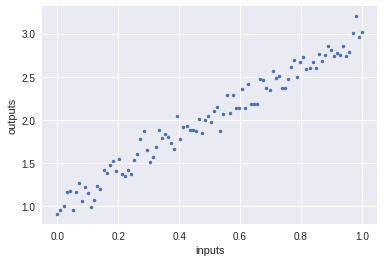

In [17]:
# First, let's make our fake dataset.
# The input will be 100 points equally spaced from 0 to 1.
# The output will be 2*inputs + 1, plus some noise.
# We're going to try to recover "2" and "1" with our linear model.
inputs = np.linspace(0, 1, 100)
outputs = 2*inputs + 1 + .1*np.random.standard_normal(100)

plt.plot(inputs, outputs, '.')
plt.xlabel('inputs')
plt.ylabel('outputs')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.485062
0.02757209
0.012857875
0.011560504
0.011446113
0.0114360275
0.011435135
0.011435062
0.011435052
0.0114350505


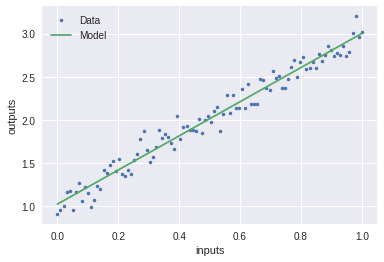

In [48]:
# First things first, let's start a new graph and session.
# Copy in the code from the first cell to restart the graph and create a session.
tf.reset_default_graph()          #Lianne: This resets the TensorFlow graph
sess = tf.InteractiveSession()    #Lianne: This starts an interactive session

# Build our model. We're going to need two variables:
# One for the weight, another for the bias.
# You can create these variables just like we created the one above.
# Note that you will have to give them different TensorFlow variable names!
# You can't give multiple variables the same name in TensorFlow.

w = tf.get_variable(name='weight', shape=(), dtype=tf.float32) #Lianne: create variable tensorflow, name, scalar and 32-bit float
b = tf.get_variable(name='bias', shape=(), dtype=tf.float32)   #Lianne: create variable tensorflow, name, scalar and 32-bit float

#sess.run(tf.global_variables_initializer())
# Compute the predictions of the model.
# Remember that we compute a linear model as w*x + b, 
# where w are the weights, x is the input, and b is the bias.
predictions = w*inputs + b    #Lianne: predictions of a linear model y=mx + c; y=wx + b, my x is the inputs 
# Compute the loss function. You can use the squared-error loss from above.
# One catch: Since you are going to be feeding in more than one point at a time,
# you need to compute the average loss over all the points.
# I've done that for you using tf.reduce_mean, which computes the mean.
# You fill in the rest.
# Lianne: RMSE = (raiz(1/m (y'-y)^2))!!!
loss = tf.reduce_mean((predictions-outputs)**2)
# Build your optimizer. You can re-use the code we used above.
# You'll need to set the learning rate yourself.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.09)
train_op = optimizer.minimize(loss)
# Initialize your variables. Use the code I showed you above.
#sess.run(train_op)
sess.run(tf.global_variables_initializer())
# Train the model! Fill in the loop.
for iteration in range(1000):
  # Write the code for running the train op below.
  sess.run(train_op)
  # Print out the loss every 100 iterations
  if not iteration % 100:
    print (sess.run(loss))
  
# After training, plot your model and the data. I've filled this in for you.
plt.plot(inputs, outputs, '.')
plt.plot(inputs, sess.run(w)*inputs + sess.run(b))
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.legend(['Data', 'Model'])

5.93853
0.0430716
0.013203
0.0111959
0.0110611
0.011052
0.0110514
0.0110514
0.0110514
0.0110514


/export/hda3/borglet/remote_hdd_fs_dirs/0.colab_kernel_pool_tensorflow_26.kernel.colaboratory-playground.154008242435.14b334fb3717c109/mount/server/rl_colab.par/google3/third_party/tensorflow/python/client/session.py:1661: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


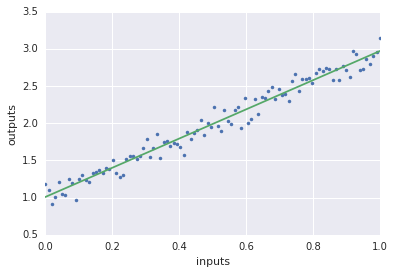

In [0]:
################
### SOLUTION ###
################
# (will not be visible to students)

# First things first, let's start a new graph and session.
# Copy in the code from the first cell to restart the graph and create a session.
tf.reset_default_graph()
sess = tf.InteractiveSession()

# Build our model. We're going to need two variables:
# One for the weight, another for the bias.
# You can create these variables just like we created the one above.
w = tf.get_variable('w', (), tf.float32)
b = tf.get_variable('b', (), tf.float32)
# Compute the predictions of the model.
# Remember that we compute a linear model as w*x + b, 
# where w are the weights, x is the input, and b is the bias.
predictions = w*inputs + b
# Compute the loss function. You can use the squared-error loss from above.
# One catch: Since you are going to be feeding in more than one point at a time,
# you need to compute the average loss over all the points.
# I've done that for you using tf.reduce_mean, which computes the mean.
# You fill in the rest.
loss = tf.reduce_mean((predictions - outputs)**2)
# Build your optimizer. You can re-use the code we used above.
# You'll need to set the learning rate yourself.
optimizer = tf.train.GradientDescentOptimizer(0.1)
train_op = optimizer.minimize(loss)
# Initialize your variables. Use the code I showed you above.
sess.run(tf.global_variables_initializer())


# Train the model! Fill in the loop.
for iteration in range(1000):
  # Write the code for running the train op below.
  sess.run(train_op)
  # Print out the loss every 100 iterations
  if not iteration % 100:
    print sess.run(loss)
  
# After training, plot your model and the data. I've filled this in for you.
plt.plot(inputs, outputs, '.')
plt.plot(inputs, sess.run(w)*inputs + sess.run(b))
plt.xlabel('inputs')
plt.ylabel('outputs')